<a href="https://colab.research.google.com/github/pranscript/ml_coursework/blob/master/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=400, height=200)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import numpy as np
from numpy import array
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle 

In [0]:
iris = load_iris()
X = iris.data
Y = iris.target

X_tree = iris.data
Y_tree = iris.target

In [295]:
dt_scores = []
for k in range(2,30):
    clf = tree.DecisionTreeClassifier(max_depth=k)
    clf.fit(X,Y)
    dt_model = pickle.dumps(clf)
    with open('dt_estimator.txt', 'wb') as fid:
      pickle.dump(clf, fid)
    score = cross_val_score(estimator=clf, X=X, y=Y, cv=5)
    dt_scores.append(score.mean()*100)
print(dt_scores)

[93.33333333333333, 96.0, 95.33333333333334, 96.00000000000001, 96.66666666666669, 96.00000000000001, 96.66666666666669, 96.66666666666669, 95.33333333333334, 96.66666666666669, 95.33333333333334, 96.66666666666669, 95.33333333333334, 96.00000000000001, 96.66666666666669, 96.00000000000001, 95.33333333333334, 96.66666666666669, 96.66666666666669, 96.66666666666669, 96.66666666666669, 96.00000000000001, 96.66666666666669, 96.00000000000001, 96.66666666666669, 96.66666666666669, 96.00000000000001, 96.00000000000001]


In [300]:
knn_scores = {}
knn_array = []

for k in range(2, 30):
  knn = KNeighborsClassifier(n_neighbors=k)
  cv_scores = cross_val_score(knn, X, Y,cv=5)
  knn_model = pickle.dumps(knn)
  with open('knn_estimator.txt', 'wb') as fid:
      pickle.dump(knn, fid)
  knn_scores[k] = np.mean(cv_scores)*100
for i in range(2, 30):
  knn_array.append(knn_scores[i])
print(knn_array)

[94.66666666666666, 96.66666666666669, 97.33333333333334, 97.33333333333334, 98.00000000000001, 98.00000000000001, 96.66666666666669, 97.33333333333334, 98.00000000000001, 98.00000000000001, 98.00000000000001, 97.33333333333334, 96.66666666666666, 96.66666666666669, 96.66666666666669, 96.66666666666669, 96.66666666666666, 96.66666666666669, 96.0, 96.66666666666669, 96.0, 96.0, 94.66666666666667, 96.0, 94.66666666666666, 94.66666666666667, 93.99999999999999, 93.33333333333333]


Text(0, 0.5, 'Testing Accuracy')

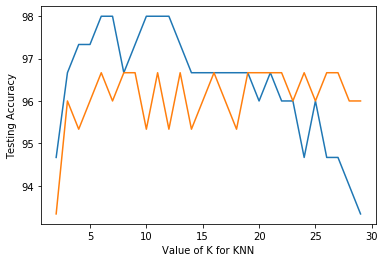

In [303]:
plt.plot(range(2,30),knn_array)
plt.plot(range(2,30),dt_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

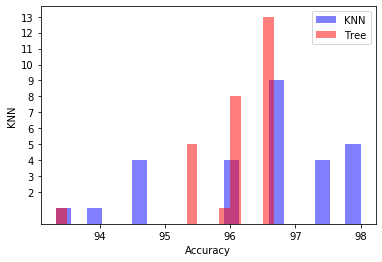

In [0]:
num_bins = 20
plt.yticks(range(2, 100))
plt.xticks(range(2, 100))
plt.hist(knn_array, num_bins, facecolor='blue', alpha=0.5, label='KNN')
plt.hist(dt_scores, num_bins, facecolor='red', alpha=0.5,label='Tree')
plt.xlabel('Accuracy',fontsize=10)
plt.ylabel('KNN',fontsize=10)
plt.legend()
plt.show()